<a href="https://colab.research.google.com/github/emiliomercuri/ciencia_dados/blob/main/aulas/2023_11_13_Aula_09_pyTorch_workflow_(atividade_em_aula_parte_1)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow



In [ ]:
o_que_vamos_cobrir_hoje = {1: "dados (preparação e importação)",
                           2: "construindo o modelo",
                           3: "ajustando o modelo aos dados (treinamento)",
                           4: "fazendo predições e avaliando o modelo (inferência)",
                           5: "salvando e importando o modelo",
                           6: "avaliando os resultados"}
o_que_vamos_cobrir_hoje

{1: 'dados (preparação e importação)',
 2: 'construindo o modelo',
 3: 'ajustando o modelo aos dados (treinamento)',
 4: 'fazendo predições e avaliando o modelo (inferência)',
 5: 'salvando e importando o modelo',
 6: 'avaliando os resultados'}

In [ ]:
import torch
from torch import nn ## nn contém os blocos de construção das Redes Neurais Artificiais
import matplotlib.pyplot as plt

## Documentação sobre Redes Neurais do PyTorch


https://pytorch.org/docs/stable/nn.html

Uma rede neural é algo como isso (vamos ver mais detalhes pra frente):

<img src="https://www.dropbox.com/scl/fi/rk25xi2cnsr0pvhc5dc6w/NN.jpg?rlkey=j8iuhazjyk6orrsfbarfnvu1w&dl=1" width="400">

## 1. Dados (preparação e carregamento)

Os dados podem ser quase qualquer coisa... no aprendizado de máquina.

* Planilha do Excel
* Imagens de qualquer tipo
* Vídeos
* Áudio
*DNA
* Texto

O aprendizado de máquina é um jogo de duas partes:
1. Obtenha os dados em uma representação numérica.
2. Construa um modelo para aprender padrões nessa representação numérica

Para mostrar isso, vamos criar alguns **dados conhecidos** usando a fórmula de regressão linear

$$
Y = a + bX
$$


Usaremos uma fórmula de regressão linear para criar uma linha reta com *parâmetros* **conhecidos**.

Os parâmetros são:

* a = bias (viés)
* b = weight (pesos)


In [ ]:
# Criando parâmetros conhecidos
weight = 0.7
bias = 0.3

# Criar um data set bem simples
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # Adicionando uma dimensão extra
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Dividir dados em conjuntos de treinamento e teste (um dos conceitos mais importantes em aprendizado de máquina em geral)

Vamos criar um conjunto de treinamento e teste com nossos dados

Cada divisão do conjunto de dados serve a um propósito específico:

| Divisão | Finalidade | Quantidade de <br> dados totais | Com que frequência <br> ele é usado? |
| :--- | :--- | :--- | :--- |
| Conjunto de treinamento | O modelo aprende com <br> esses dados. | $\sim 60-80 \%$ | Sempre |
| Conjunto de validação | O modelo é ajustado nesses <br> dados  (como o exame simulado <br> que você faz antes do exame final). | $\sim 10-20 \%$ | Frequentemente, <br> mas nem sempre |
| Conjunto de teste | O modelo é avaliado com base <br> nesses dados para testar <br> o que aprendeu. | $\sim 10-20 \%$ | Sempre |


In [ ]:
# Crie uma divisão de treinameto/teste dos dados
train_split = int(0.8*len(X)) # 80% dos dados
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#X_train, y_train

Um método melhor para separação dos dados é usar a função `train_test_split` da biblioteca `scikit-learn`, que adiciona um pouco de aleatoriedade na separação.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
tensor_A = torch.randn(2,2)
tensor_B = torch.randn(2,2)
print(tensor_A)
print(tensor_B)
print(tensor_A == tensor_B)

tensor([[-0.5709,  0.8285],
        [-0.5754, -0.4108]])
tensor([[ 0.3850, -1.6049],
        [-0.1724,  0.6406]])
tensor([[False, False],
        [False, False]])


In [ ]:
torch.manual_seed(34)
tensor_A = torch.randn(2,2)
torch.manual_seed(34)
tensor_B = torch.randn(2,2)
print(tensor_A)
print(tensor_B)
print(tensor_A == tensor_B)

tensor([[ 1.4219, -0.2314],
        [ 0.3739, -0.4679]])
tensor([[ 1.4219, -0.2314],
        [ 0.3739, -0.4679]])
tensor([[True, True],
        [True, True]])


### Como podemos visualizar melhor os nossos dados?

Aqui está o nosso primeiro **lema** de exploradores de dados!

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Faz um gráfico dos dados de treinamento, teste e compara as predições
  """
  plt.figure(figsize=(5,3))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4,label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist (in red)
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size":10})

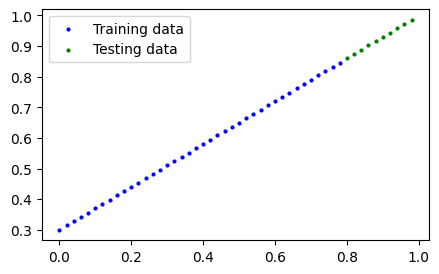

In [ ]:
plot_predictions()

## 2. Construindo o modelo

Nosso primeiro modelo em PyTorch!

Para isso iremos criar classes em Python, o que não havíamos usado antes, para mais informações sugiro a leitura do seguinte material:
https://realpython.com/python3-object-oriented-programming/

Esse link explica o que é Object-oriented programming (OOP).

O que o nosso modelo faz:
* Começa com valores aleatórios (weight & bias)
* Le os dados de treinamento e ajusta os valores aleatórios para melhor representar (ou chegar o mais próximo possível) dos valores ideais (weight and bias) que usamos para criar os dados.

Como ele faz isso?

Através de dois algoritmos principais:
1. Gradient descent ou método do gradiente (https://en.wikipedia.org/wiki/Gradient_descent)
2. Backpropagation ou Retropropagação do erro (https://en.wikipedia.org/wiki/Backpropagation)

O código `requires_grad=True` aciona o método do gradiente e o modelo atualiza o weight e bias usando retropopagação do erro

Videos extra classe:

1. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab

In [ ]:
# Criar uma classe para regressão linear
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Iniciar os parâmetros do modelo
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                         dtype=torch.float))

  # Método para o cálculo sequencial do modelo
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

## PyTorch model building blocks essentiais

* torch.nn - contem todos os blocos de contrução de grafos (redes reurais artificiais)
* torch.nn.Parameter - quais parâmetros deve o nosso modelo aprender
* torch.nn.Module - Uma classe para todas os módulos de redes neurais, se você usar uma subclasse você deverá reescrever forward()
* torch.optim - ondem estão todos os otimizadres do PyTorch
* def forward() - todas subclasses nn.Module requerem que você reescreva forward()

Mais informações de módulos essenciais via PyTorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

## Checando o conteúdo do nosso modelo PyTorch

Agora que criamos o modelo, vamos ver o que temos dentro dele...

Podemos checar os parâmetros do nosso modelo usando `.parameters()`

In [ ]:
# Criando uma semente aleatória
torch.manual_seed(42)

# Criando uma instância do modelo
model_0 = LinearRegressionModel()

# Checando os parâmetros
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.randn(1)

tensor([0.2345])

In [ ]:
# lista named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Queremos que o nosso modelo reproduza os valores iniciais que usamos
# para criar os dados
weight, bias

(0.7, 0.3)

## Fazendo predições usando `torch.inference_mode()`

Parar verificar o poder preditivo do nosso modelo, vamos ver quão bom ele prediz `y_test` baseado em `X_test`.

Quando informamos (alimentamos) dados ao nosso modelo, ele irá rodar através do método `forward()`

In [ ]:
# Fazer predições com o modelo
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

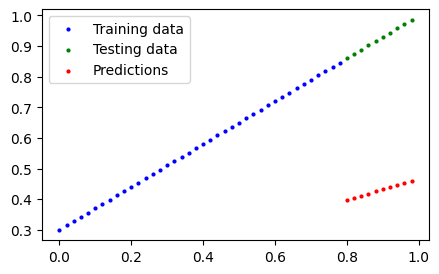

In [ ]:
# Vamos visualizar esse primeiro resultado
plot_predictions(predictions=y_preds)

## 3. Treinar o modelo

A ideia geral do treinamento é fazer com que o modelo parta de parâmetros inicias desconhecidos (que podem ser aleatórios) até ser calibrado com parâmetros conhecidos.

Em outras palavras, o modelo vai partir de uma representação pobre dos dados para uma representação melhor.

Uma maneira de medir o quão ruim ou errado o nosso modelo está é usar uma função de perda ou função de custo (Loss function).

O que precisamos fazer para realizar o treinamento:

* **Loss Function**: mede o quão bom o nosso modelo está em relação às saídas ideis
* **Optimizer**: leva em conta o custo ou perda e ajusta os parâmetros do modelo (weights e bias).

 * Dentro do optimizer você precisará definir dois parâmetros:
  * `params` - os parâmetros do modelo que você quer otimizar.
  * `lr` (learning rate) - a taxa de aprendizado (hiperparâmetro)



In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Vamos usar a função `L1Loss` que é igual ao MAE (Mean Absolute Error)

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent - SGD)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

# A função do otimizador é fornecer valores para a o modelo de aprendizado
# de máquina (aumentar ou diminuir pesos e bias) que minimizem a função perda

## Construindo um loop de Treinamento (e Teste) em PyTorch

Algumas coisas que precisamos para o loop de treinamento:

* 0. Loop para percorrer os dados e fazer o seguinte:
* 1. Forward pass: isso involve passar os dados na função `forward()` do nosso modelo para fazer predições
* 2. Calcular a perda (Loss Funtion)
* 3. Optimizer zero grad
* 4. Loss backward - retropropagar através do Modelo para calcular os gradientes de cada parâmetro (**backpropagation**)
* 5. Optimizer step - usar o otimizados para ajustar os parâmetros do nosso modelo e tentar reduzir a função perda/custo (**gradient descent**)

In [ ]:
# Uma época é um loop passando todos os dados através do MML
epochs = 10

### Training
# 0. Loop para passar os dados
for epoch in range(epochs):
  # configurar o modelo para o modo treinamento
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step() # calcula o passo do otimizador

  ### Testing
  model_0.eval() # desabilita o gradient descent

  # Print o state_dict()
  print(model_0.state_dict())


Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Loss: 0.1976713240146637
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])


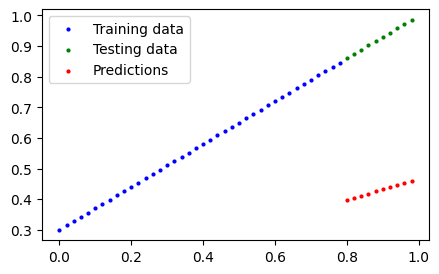

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

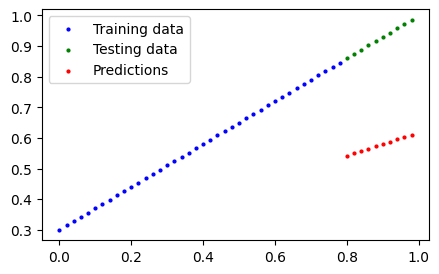

In [ ]:
plot_predictions(predictions=y_preds_new)

## Refazendo um loop de treinamento (e de teste) para 200 épocas

In [ ]:
# Adicionando uma semente aleatória
torch.manual_seed(42)

# Uma época é um loop passando todos os dados através do MML
epochs = 200

# Listas para armazenar os resultados ao longo das épocas de treinamento/teste
epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
for epoch in range(epochs):
  # config the model for training
  model_0.train()
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation
  loss.backward()
  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loos
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss: {test_loss}")
    # Print our model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss:0.1746293306350708 | Test loss: 0.3194132149219513
OrderedDict([('weights', tensor([0.3874])), ('bias', tensor([0.2588]))])
Epoch: 10 | Loss:0.07638873159885406 | Test loss: 0.19773726165294647
OrderedDict([('weights', tensor([0.4258])), ('bias', tensor([0.3463]))])
Epoch: 20 | Loss:0.05069301277399063 | Test loss: 0.13647659122943878
OrderedDict([('weights', tensor([0.4564])), ('bias', tensor([0.3803]))])
Epoch: 30 | Loss:0.04463795945048332 | Test loss: 0.1100495308637619
OrderedDict([('weights', tensor([0.4788])), ('bias', tensor([0.3868]))])
Epoch: 40 | Loss:0.04098063334822655 | Test loss: 0.09699545800685883
OrderedDict([('weights', tensor([0.4974])), ('bias', tensor([0.3833]))])
Epoch: 50 | Loss:0.0375034399330616 | Test loss: 0.08666229248046875
OrderedDict([('weights', tensor([0.5152])), ('bias', tensor([0.3778]))])
Epoch: 60 | Loss:0.03407188132405281 | Test loss: 0.07907666265964508
OrderedDict([('weights', tensor([0.5322])), ('bias', tensor([0.3703]))])
Epoc

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

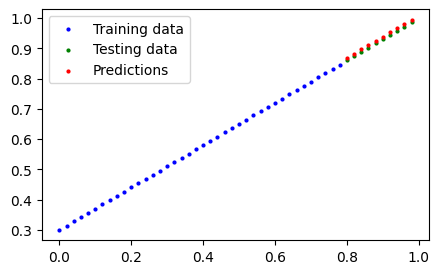

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
torch.tensor(train_loss_values).cpu().numpy()

array([0.17462933, 0.07638873, 0.05069301, 0.04463796, 0.04098063,
       0.03750344, 0.03407188, 0.03063862, 0.02719982, 0.02376995,
       0.020335  , 0.01689645, 0.01346802, 0.01003139, 0.00659453,
       0.00316608, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

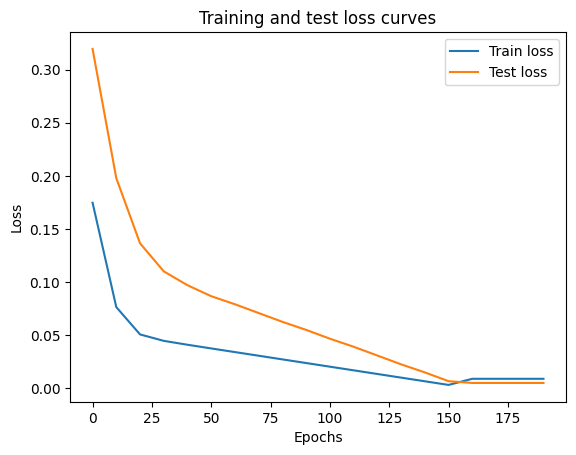

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(train_loss_values).cpu().numpy(), label='Train loss')
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Salvando o modelo em PyTorch

Existem 3 métodos para salvar e abrir um modelo em PyTorch

1. `torch.save()` - salva o modelo no formato pickle - https://docs.python.org/3/library/pickle.html
2. `torch.load()` - abre o objeto PyTorch
3. `torch.nn.Module.load_state_dict()` - permite que você abra um dicionário com o estado do seu modelo salvo

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving our PyTorch state dict
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Nov 13 13:55 01_pytorch_workflow_model_0.pth


# Abrindo um modelo PyTorch

Como salvamos o `state_dict()` do nosso modelo, vamos criar uma nova instância do modelo e abrir o `state_dict()` na nova instância.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Para abrir no Colab um `state_dict` salvo nós vamos instanciar uma nova instância
# da classe do nosso modelo
loaded_model_0 = LinearRegressionModel()

#loaded_model_0.state_dict()

# Load the saved state_dict of model_) into loaded_model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare predictions
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])